# Joda viikko 7

Viimeisen luennon aiheena oli visuaalinen analytiikka. Itse en päässyt harmillisesti luennolle paikan päälle, joten teen tämän oppimispäiväkirjan pitkälti luentomateriaalien perusteella. Materiaalien mukaan visualisoinnilla on kaksi keskeistä sovellusta datatieteissä. Nämä ovat eksploratiivinen analytiikka, jossa kartoitetaan raakadataa. Toinen on kommunikointi, jossa tulokset esitetään loppukäyttäjille. Eksploraativiseen analytiikkaan liitty vahvasti tietojohtamisessa yleisesti käytetty datan luokittelu dataan, informaation ja tietämykseen. Uskoisin, että visuaalisen analytiikan avulla voidaan luoda datasta/informaatiosta tietämystä, joka auttaa organisaatioita eteenpäin. Visualisointi ei aina ole helppoa ja visualisointeja täytyy suunnitella hyvin, jotta vältytään virheiltä ja saadaan järkevää hyötyä irti visualisoinneista. 

Etenkin erilaisia kuvaajia piirrettäessä on tärkeää, että aikajanat ja muut valitaan hyvin, jotta data näyttää relevantita. Kuvaajien aikajanoja muokkaamalla saadaan visualisointi helposti näyttämään siltä miltä halutaan. Esimerkkinä pörssikurssit. Joku voi halutessaan ottaa yhden huonon pörssipäivän kuvaajan ja käyttää sitä analyysinsä tukemisessa ja sanoa, että osakemarkkinoille sijoittaminen on typerää. Toisaalta jos näytettäisiin pitkän aikavälin pörssikursseja nähtäisiin, että pitkällä aikavälillä osakesijoittaminen on todella hyvää vastinetta rahalle. Tämä vain yksi esimerkki kuvaajien aikajänteen valitsemisesta. Loppulukijoiden täytyykin usein olla hereillä kun heille näytetään visualisointeja. Toisaalta myös visualisointien luojan täytyy tietää mitä tekee. Nykyään monilla työkaluilla voidaan luoda käyttäjälle dashboardeilla, joilla he voivat itse visualisoida jo olemassa olevia datasettejä, jolloin käyttäjät eivät ole täysin visualisointien luojien antaman informaation varassa. 


asd


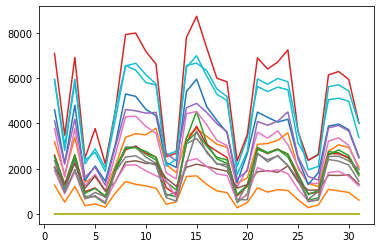

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

def split_date(df):
    
    df2 = df.dropna(how='all',axis=0)
    pva = []
    for x in df2['Päivämäärä'].values:
        p = x.split()
        pva.append(p)
    df2 = df2.drop('Päivämäärä', axis=1)
    new_df = pd.DataFrame(pva, columns=['Weekday','Day','Month', 'Year', 'Hour'])
    new_df['Weekday'].loc[new_df.Weekday == 'ke'] = 'Wed'
    new_df['Weekday'].loc[new_df.Weekday == 'ma'] = 'Mon'
    new_df['Weekday'].loc[new_df.Weekday == 'ti'] = 'Tue'
    new_df['Weekday'].loc[new_df.Weekday == 'to'] = 'Thu'
    new_df['Weekday'].loc[new_df.Weekday == 'pe'] = 'Fri'
    new_df['Weekday'].loc[new_df.Weekday == 'la'] = 'Sat'
    new_df['Weekday'].loc[new_df.Weekday == 'su'] = 'Sun'
    new_df['Month'].loc[new_df.Month == 'tammi'] = 1
    new_df['Month'].loc[new_df.Month == 'helmi'] = 2
    new_df['Month'].loc[new_df.Month == 'maalis'] = 3
    new_df['Month'].loc[new_df.Month == 'huhti'] = 4
    new_df['Month'].loc[new_df.Month == 'touko'] = 5
    new_df['Month'].loc[new_df.Month == 'kesä'] = 6
    new_df['Month'].loc[new_df.Month == 'heinä'] = 7
    new_df['Month'].loc[new_df.Month == 'elo'] = 8
    new_df['Month'].loc[new_df.Month == 'syys'] = 9
    new_df['Month'].loc[new_df.Month == 'loka'] = 10
    new_df['Month'].loc[new_df.Month == 'marras'] = 11
    new_df['Month'].loc[new_df.Month == 'joulu'] = 12
    new_df['Hour'] = new_df['Hour'].apply(lambda s: int(s.split(':')[0]))
    new_df = new_df.astype({'Month':int,'Day':int,'Year':int})
    final_df = pd.concat([new_df,df2], axis=1)

    return final_df

def cyclists_per_day():
    df = pd.read_csv('Helsingin_pyorailijamaarat.csv', sep=';')
    df = split_date(df)
    df = df.drop('Unnamed: 21', axis=1)
    df1 = df.groupby(['Year', 'Month', 'Day'])
    df1 = df1.sum()
    df1 = df1.drop('Hour',axis=1)
    return df1
    
def main():
    print("asd")
    df = cyclists_per_day()
    sett = df.loc[2017,8]
    plt.plot(sett)
    plt.show()
if __name__ == "__main__":
    main()


In [ ]:
Yllä näkyy eräs tekemäni koodin pätkä, jossa visualisoiidan helsingin pyöräilijämääriä. 
Oivallukset: 1. Tiedon eri tasot liittyvät visualiisen analytiikkaan.
             2. Visualisoinneilla on helppo johtaa harhaan
             3. Visualisoinnit ovat tärkeitä, jos halutaan vaikuttaa ihmisiin. 
             4. Nykyään on paljon vaihtoehtoja visualisointityökaluille.